In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# plotting options
import matplotlib as mpl
mpl.rc('font',**{'family':'sans-serif','size':14})
mpl.rcParams['xtick.direction'] = 'in'
mpl.rcParams['ytick.direction'] = 'in'

In [2]:
# import our Monte Carlo scattering script
import simple_compton_mc

In [3]:
# helper routines for concatenating all collected samples and for plotting the SED
def collect_photons(total_nu,total_energy):
    nu_dist=[]; E_dist=[]
    for n,EE in zip(total_nu,total_energy):
        nu_dist+=list(n[0])
        E_dist+=list(EE[0])
    return nu_dist,E_dist

def plot_nulnu(nu_dist,E_dist,**kwargs):
    h,x = np.histogram(np.log10(nu_dist),bins=100,weights=E_dist)
    xc=0.5*(x[:-1]+x[1:])
    plt.loglog(10**xc,h,**kwargs)


# Example 1: run a single calculation and plot the result

In [4]:
# set input parameters
# some options are
# velmag_in: bulk e- velocity in cm/s (random, similar to a temperature)
# ne_in: e- number density in cm^-3
# R_in: radius of sphere in cm
# n_samp_in: number of photon packets to sample (only once, at the start, fractional noise ~ n_samp^-1/2)
# n_time_steps_in: number of time steps, by default = 1000 (ideally chosen to match when all photons should escape)

simple_compton_mc.init_parameters(velmag_in=2.99e10,ne_in=1e8,n_samp_in=int(1e6),n_time_steps_in=400)

# run the calculation
simple_compton_mc.run()

# copy the output variables
total_energy = simple_compton_mc.total_energy.copy()
total_nu = simple_compton_mc.total_nu.copy()
nu_input = simple_compton_mc.nu_input.copy()
E_input = simple_compton_mc.E_input.copy()

tausc:  0.00663
compton y:  1.328213689482477
active photons:  1000000
i tstart:  0 33.333333333333336
active photons:  1000000
i tstart:  1 66.66666666666667
active photons:  1000000
i tstart:  2 100.0
active photons:  1000000
i tstart:  3 133.33333333333334
active photons:  1000000
i tstart:  4 166.66666666666669
active photons:  1000000
i tstart:  5 200.00000000000003
active photons:  1000000
i tstart:  6 233.33333333333337
active photons:  1000000
i tstart:  7 266.6666666666667
active photons:  1000000
i tstart:  8 300.0
active photons:  1000000
i tstart:  9 333.3333333333333
active photons:  1000000
i tstart:  10 366.66666666666663
active photons:  1000000
i tstart:  11 399.99999999999994
active photons:  1000000
i tstart:  12 433.33333333333326
active photons:  1000000
i tstart:  13 466.6666666666666
active photons:  1000000
i tstart:  14 499.9999999999999
active photons:  1000000
i tstart:  15 533.3333333333333
active photons:  1000000
i tstart:  16 566.6666666666666
active phot

Text(0.5, 0, 'frequency $\\nu$ (Hz)')

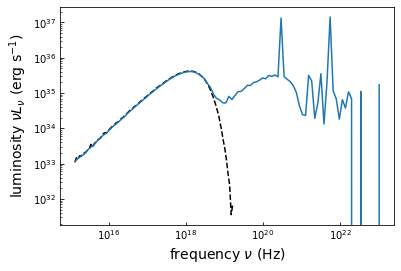

In [5]:
# make a plot of the input spectrum (black dashed line) and output spectrum (blue)
plot_nulnu(simple_compton_mc.nu_input,simple_compton_mc.E_input*2.,color='k',linestyle='--')
nu_dist,E_dist = collect_photons(total_nu,total_energy)
plot_nulnu(nu_dist,E_dist)
plt.xscale('log'); plt.yscale('log')
plt.ylabel(r'luminosity $\nu L_\nu$ (erg s$^{-1}$)',fontsize=14); plt.xlabel(r'frequency $\nu$ (Hz)',fontsize=14)

# Example 2: run a list of calculations and plot the results

In [6]:
# run a list over constant e- Lorentz factor \gamma, varying the particle density
# (runs for a couple of minutes)
velmag=2.8e10
ne=[3e8,1e9,3e9]
E_list = []; nu_list = []; nu_input_list=[]; E_input_list=[]
for n in ne:
    simple_compton_mc.init_parameters(velmag_in=velmag,ne_in=n,n_samp_in=int(1e6))
    simple_compton_mc.run()
    total_energy = simple_compton_mc.total_energy.copy()
    total_nu = simple_compton_mc.total_nu.copy()
    nu_input = simple_compton_mc.nu_input.copy()
    E_input = simple_compton_mc.E_input.copy()
    nu_list.append(total_nu); E_list.append(total_energy); nu_input_list.append(nu_input)
    E_input_list.append(E_input)

tausc:  0.019889999999999998
compton y:  0.20575862068965523
active photons:  1000000
i tstart:  0 33.333333333333336
active photons:  1000000
i tstart:  1 66.66666666666667
active photons:  1000000
i tstart:  2 100.0
active photons:  1000000
i tstart:  3 133.33333333333334
active photons:  1000000
i tstart:  4 166.66666666666669
active photons:  1000000
i tstart:  5 200.00000000000003
active photons:  1000000
i tstart:  6 233.33333333333337
active photons:  1000000
i tstart:  7 266.6666666666667
active photons:  1000000
i tstart:  8 300.0
active photons:  1000000
i tstart:  9 333.3333333333333
active photons:  1000000
i tstart:  10 366.66666666666663
active photons:  1000000
i tstart:  11 399.99999999999994
active photons:  1000000
i tstart:  12 433.33333333333326
active photons:  1000000
i tstart:  13 466.6666666666666
active photons:  1000000
i tstart:  14 499.9999999999999
active photons:  1000000
i tstart:  15 533.3333333333333
active photons:  1000000
i tstart:  16 566.6666666666

active photons:  2101
i tstart:  193 6466.666666666652
active photons:  2060
i tstart:  194 6499.999999999985
active photons:  2008
i tstart:  195 6533.3333333333185
active photons:  1956
i tstart:  196 6566.6666666666515
active photons:  1899
i tstart:  197 6599.9999999999845
active photons:  1849
i tstart:  198 6633.333333333318
active photons:  1799
i tstart:  199 6666.666666666651
active photons:  1759
i tstart:  200 6699.999999999984
active photons:  1722
i tstart:  201 6733.333333333317
active photons:  1667
i tstart:  202 6766.66666666665
active photons:  1622
i tstart:  203 6799.999999999983
active photons:  1577
i tstart:  204 6833.333333333316
active photons:  1536
i tstart:  205 6866.666666666649
active photons:  1505
i tstart:  206 6899.999999999982
active photons:  1465
i tstart:  207 6933.333333333315
active photons:  1422
i tstart:  208 6966.666666666648
active photons:  1381
i tstart:  209 6999.999999999981
active photons:  1356
i tstart:  210 7033.333333333314
active p

i tstart:  757 11000.000000000022
i tstart:  758 11000.000000000022
i tstart:  759 11000.000000000022
i tstart:  760 11000.000000000022
i tstart:  761 11000.000000000022
i tstart:  762 11000.000000000022
i tstart:  763 11000.000000000022
i tstart:  764 11000.000000000022
i tstart:  765 11000.000000000022
i tstart:  766 11000.000000000022
i tstart:  767 11000.000000000022
i tstart:  768 11000.000000000022
i tstart:  769 11000.000000000022
i tstart:  770 11000.000000000022
i tstart:  771 11000.000000000022
i tstart:  772 11000.000000000022
i tstart:  773 11000.000000000022
i tstart:  774 11000.000000000022
i tstart:  775 11000.000000000022
i tstart:  776 11000.000000000022
i tstart:  777 11000.000000000022
i tstart:  778 11000.000000000022
i tstart:  779 11000.000000000022
i tstart:  780 11000.000000000022
i tstart:  781 11000.000000000022
i tstart:  782 11000.000000000022
i tstart:  783 11000.000000000022
i tstart:  784 11000.000000000022
i tstart:  785 11000.000000000022
i tstart:  786

active photons:  1000000
i tstart:  0 33.333333333333336
active photons:  1000000
i tstart:  1 66.66666666666667
active photons:  1000000
i tstart:  2 100.0
active photons:  1000000
i tstart:  3 133.33333333333334
active photons:  1000000
i tstart:  4 166.66666666666669
active photons:  1000000
i tstart:  5 200.00000000000003
active photons:  1000000
i tstart:  6 233.33333333333337
active photons:  1000000
i tstart:  7 266.6666666666667
active photons:  1000000
i tstart:  8 300.0
active photons:  1000000
i tstart:  9 333.3333333333333
active photons:  1000000
i tstart:  10 366.66666666666663
active photons:  1000000
i tstart:  11 399.99999999999994
active photons:  1000000
i tstart:  12 433.33333333333326
active photons:  1000000
i tstart:  13 466.6666666666666
active photons:  1000000
i tstart:  14 499.9999999999999
active photons:  1000000
i tstart:  15 533.3333333333333
active photons:  1000000
i tstart:  16 566.6666666666666
active photons:  1000000
i tstart:  17 600.0
active photo

i tstart:  150 5033.333333333332
active photons:  17599
i tstart:  151 5066.666666666665
active photons:  17274
i tstart:  152 5099.999999999998
active photons:  16910
i tstart:  153 5133.333333333331
active photons:  16579
i tstart:  154 5166.666666666664
active photons:  16266
i tstart:  155 5199.999999999997
active photons:  15957
i tstart:  156 5233.33333333333
active photons:  15625
i tstart:  157 5266.666666666663
active photons:  15318
i tstart:  158 5299.999999999996
active photons:  14998
i tstart:  159 5333.333333333329
active photons:  14702
i tstart:  160 5366.666666666662
active photons:  14371
i tstart:  161 5399.999999999995
active photons:  14114
i tstart:  162 5433.3333333333285
active photons:  13815
i tstart:  163 5466.6666666666615
active photons:  13539
i tstart:  164 5499.9999999999945
active photons:  13259
i tstart:  165 5533.333333333328
active photons:  13007
i tstart:  166 5566.666666666661
active photons:  12741
i tstart:  167 5599.999999999994
active photon

i tstart:  348 11633.333333333367
active photons:  34
i tstart:  349 11666.6666666667
active photons:  32
i tstart:  350 11700.000000000035
active photons:  32
i tstart:  351 11733.333333333369
active photons:  30
i tstart:  352 11766.666666666702
active photons:  30
i tstart:  353 11800.000000000036
active photons:  28
i tstart:  354 11833.33333333337
active photons:  26
i tstart:  355 11866.666666666704
active photons:  26
i tstart:  356 11900.000000000038
active photons:  25
i tstart:  357 11933.333333333372
active photons:  24
i tstart:  358 11966.666666666706
active photons:  24
i tstart:  359 12000.00000000004
active photons:  24
i tstart:  360 12033.333333333374
active photons:  24
i tstart:  361 12066.666666666708
active photons:  24
i tstart:  362 12100.000000000042
active photons:  24
i tstart:  363 12133.333333333376
active photons:  23
i tstart:  364 12166.66666666671
active photons:  22
i tstart:  365 12200.000000000044
active photons:  21
i tstart:  366 12233.333333333378

i tstart:  784 14333.333333333416
i tstart:  785 14333.333333333416
i tstart:  786 14333.333333333416
i tstart:  787 14333.333333333416
i tstart:  788 14333.333333333416
i tstart:  789 14333.333333333416
i tstart:  790 14333.333333333416
i tstart:  791 14333.333333333416
i tstart:  792 14333.333333333416
i tstart:  793 14333.333333333416
i tstart:  794 14333.333333333416
i tstart:  795 14333.333333333416
i tstart:  796 14333.333333333416
i tstart:  797 14333.333333333416
i tstart:  798 14333.333333333416
i tstart:  799 14333.333333333416
i tstart:  800 14333.333333333416
i tstart:  801 14333.333333333416
i tstart:  802 14333.333333333416
i tstart:  803 14333.333333333416
i tstart:  804 14333.333333333416
i tstart:  805 14333.333333333416
i tstart:  806 14333.333333333416
i tstart:  807 14333.333333333416
i tstart:  808 14333.333333333416
i tstart:  809 14333.333333333416
i tstart:  810 14333.333333333416
i tstart:  811 14333.333333333416
i tstart:  812 14333.333333333416
i tstart:  813

i tstart:  15 533.3333333333333
active photons:  1000000
i tstart:  16 566.6666666666666
active photons:  1000000
i tstart:  17 600.0
active photons:  1000000
i tstart:  18 633.3333333333334
active photons:  1000000
i tstart:  19 666.6666666666667
active photons:  1000000
i tstart:  20 700.0000000000001
active photons:  1000000
i tstart:  21 733.3333333333335
active photons:  1000000
i tstart:  22 766.6666666666669
active photons:  1000000
i tstart:  23 800.0000000000002
active photons:  1000000
i tstart:  24 833.3333333333336
active photons:  1000000
i tstart:  25 866.666666666667
active photons:  1000000
i tstart:  26 900.0000000000003
active photons:  1000000
i tstart:  27 933.3333333333337
active photons:  1000000
i tstart:  28 966.6666666666671
active photons:  1000000
i tstart:  29 1000.0000000000005
active photons:  1000000
i tstart:  30 1033.3333333333337
active photons:  1000000
i tstart:  31 1066.666666666667
active photons:  1000000
i tstart:  32 1100.0000000000002
active ph

i tstart:  165 5533.333333333328
active photons:  39181
i tstart:  166 5566.666666666661
active photons:  38415
i tstart:  167 5599.999999999994
active photons:  37692
i tstart:  168 5633.333333333327
active photons:  36913
i tstart:  169 5666.66666666666
active photons:  36223
i tstart:  170 5699.999999999993
active photons:  35511
i tstart:  171 5733.333333333326
active photons:  34792
i tstart:  172 5766.666666666659
active photons:  34106
i tstart:  173 5799.999999999992
active photons:  33420
i tstart:  174 5833.333333333325
active photons:  32767
i tstart:  175 5866.666666666658
active photons:  32073
i tstart:  176 5899.999999999991
active photons:  31468
i tstart:  177 5933.333333333324
active photons:  30803
i tstart:  178 5966.666666666657
active photons:  30183
i tstart:  179 5999.99999999999
active photons:  29603
i tstart:  180 6033.333333333323
active photons:  29057
i tstart:  181 6066.666666666656
active photons:  28469
i tstart:  182 6099.999999999989
active photons:  

active photons:  736
i tstart:  315 10533.333333333347
active photons:  712
i tstart:  316 10566.66666666668
active photons:  690
i tstart:  317 10600.000000000015
active photons:  674
i tstart:  318 10633.333333333348
active photons:  661
i tstart:  319 10666.666666666682
active photons:  638
i tstart:  320 10700.000000000016
active photons:  622
i tstart:  321 10733.33333333335
active photons:  606
i tstart:  322 10766.666666666684
active photons:  585
i tstart:  323 10800.000000000018
active photons:  575
i tstart:  324 10833.333333333352
active photons:  563
i tstart:  325 10866.666666666686
active photons:  551
i tstart:  326 10900.00000000002
active photons:  525
i tstart:  327 10933.333333333354
active photons:  512
i tstart:  328 10966.666666666688
active photons:  503
i tstart:  329 11000.000000000022
active photons:  482
i tstart:  330 11033.333333333356
active photons:  469
i tstart:  331 11066.66666666669
active photons:  453
i tstart:  332 11100.000000000024
active photons

i tstart:  492 16433.333333333452
active photons:  3
i tstart:  493 16466.666666666784
active photons:  3
i tstart:  494 16500.000000000116
active photons:  3
i tstart:  495 16533.33333333345
active photons:  3
i tstart:  496 16566.66666666678
active photons:  3
i tstart:  497 16600.000000000113
active photons:  3
i tstart:  498 16633.333333333445
active photons:  3
i tstart:  499 16666.666666666777
active photons:  3
i tstart:  500 16700.00000000011
active photons:  3
i tstart:  501 16733.33333333344
active photons:  3
i tstart:  502 16766.666666666773
active photons:  3
i tstart:  503 16800.000000000106
active photons:  3
i tstart:  504 16833.333333333438
active photons:  3
i tstart:  505 16866.66666666677
active photons:  3
i tstart:  506 16900.000000000102
active photons:  3
i tstart:  507 16933.333333333434
active photons:  3
i tstart:  508 16966.666666666766
active photons:  3
i tstart:  509 17000.0000000001
active photons:  3
i tstart:  510 17033.33333333343
active photons:  3
i

i tstart:  871 19500.000000000007
i tstart:  872 19500.000000000007
i tstart:  873 19500.000000000007
i tstart:  874 19500.000000000007
i tstart:  875 19500.000000000007
i tstart:  876 19500.000000000007
i tstart:  877 19500.000000000007
i tstart:  878 19500.000000000007
i tstart:  879 19500.000000000007
i tstart:  880 19500.000000000007
i tstart:  881 19500.000000000007
i tstart:  882 19500.000000000007
i tstart:  883 19500.000000000007
i tstart:  884 19500.000000000007
i tstart:  885 19500.000000000007
i tstart:  886 19500.000000000007
i tstart:  887 19500.000000000007
i tstart:  888 19500.000000000007
i tstart:  889 19500.000000000007
i tstart:  890 19500.000000000007
i tstart:  891 19500.000000000007
i tstart:  892 19500.000000000007
i tstart:  893 19500.000000000007
i tstart:  894 19500.000000000007
i tstart:  895 19500.000000000007
i tstart:  896 19500.000000000007
i tstart:  897 19500.000000000007
i tstart:  898 19500.000000000007
i tstart:  899 19500.000000000007
i tstart:  900

Text(0.5, 0, 'frequency $\\nu$ (Hz)')

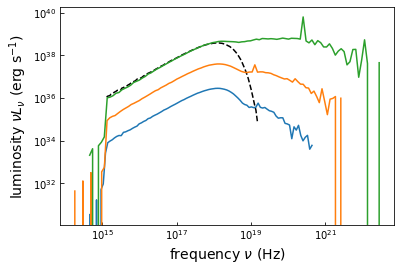

In [7]:
plot_nulnu(nu_input,E_input*2.,color='k',linestyle='--')
for nu,E in zip(nu_list,E_list):
    nu_dist,E_dist = collect_photons(nu,E)
    plot_nulnu(nu_dist,E_dist)
plt.xscale('log'); plt.yscale('log')
plt.ylabel(r'luminosity $\nu L_\nu$ (erg s$^{-1}$)',fontsize=14); plt.xlabel(r'frequency $\nu$ (Hz)',fontsize=14)

## are these results what you expect? do they match quantitatively with approximate solutions from class for relevant $\tau_{\rm sc}$, $y$? why or why not? any surprises?

# some further suggestions for exploring
--additional parameter space surveys and comparison to analytic solutions, or apply to the parameters of known objects (examples from class/homework or anywhere else in the Universe)

--numerical issues: how do the requirements on number of photon packets, time steps change as a function of scattering optical depth? why is the high energy part of the spectrum always the noisiest? why are Monte Carlo codes challenging numerically when the medium is optically thick to scattering?

--unit testing: e.g., is our Compton scattering solution for a single interaction correct? are there other useful test problems we could study?

--code development: there are many interesting corrections/generalizations to the current calculation, including 
i)  conserving energy by changing the energy of the e-
ii) continuously emitting new photons
iii) sampling from a thermal distribution (done for non-relativistic e-, see commented out "sample_maxwell" call in the code and variable Thetae_in)
iv) generalizing to the Klein-Nishina 